# Chapter 03

## 1 Least Square Coefficient  Estimate
$$\hat{\beta_1}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$
$$\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$$

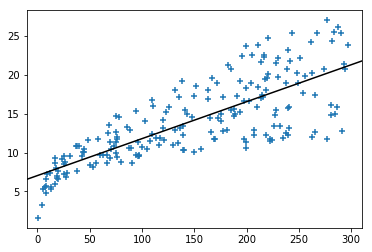

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
def LSCE(x, y):
    beta_1 = np.sum((x - np.mean(x))*(y-np.mean(y))) / np.sum((x-np.mean(x))*(x-np.mean(x)))
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    return beta_0, beta_1
advertising = pd.read_csv('Advertising.csv',index_col=0)
tv = advertising['TV']
sales = advertising['Sales']
beta_0, beta_1 = LSCE(tv,sales)
x = np.linspace(-10,310,1000)
y = beta_1 * x + beta_0
plt.scatter(tv, sales, marker='+')
plt.plot(x, y,c='k')
plt.xlim(-10,310)
plt.show()

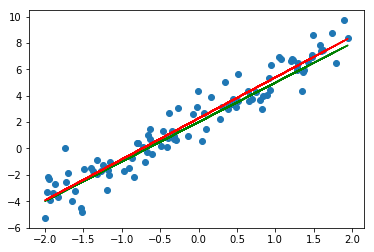

In [45]:
beta_1 = 3
beta_0 = 2
random = np.random.normal(size=100, loc=0, scale=1)
X = np.linspace(-2,2,500)
X = np.random.choice(X, size=100, replace=False)
Y = X*beta_1+beta_0 +random
y_true = X*beta_1+beta_0
beta_0_, beta_1_ = LSCE(X, Y)
y_predict = X *beta_1_ + beta_0_
plt.scatter(X,Y)
plt.plot(X,y_true, c='g')
plt.plot(X, y_predict, c='r')
plt.show()

The difference between the population regression line adn the least squres lien many seem quite confusing. The answer is using a sample to estimate the characteristics of a large population.  
How accurate is the sample mean $\hat{\mu}$ as an estimate of $\mu$
$$
Var(\hat{\mu}) = SE(\hat{\mu})^2=\frac{\sigma^2}{n}
$$
computing the standard errors associated with $\hat{\beta_0}$ and $\hat{\beta_1}$
$$
SE(\hat{\beta_0})^2 = \sigma^2\left[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i-\bar{x})^2} \right],
SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}
$$
where $\sigma^2=Var(\epsilon)$, $\sigma$ is known as the *residual standard error*, and is given by the formula $RSE=\sqrt{RSS/(n-2)}$

## 1.1 Confidence intervals
For linear regression, the $95\%$ confidence interval for $\beta_1$ and $\beta_0$ approximately takes the form $$\hat{\beta_1}\pm 2  SE(\hat{\beta_1}),
\hat{\beta_0} \pm 2 SE(\hat{\beta_0})
$$

## 1.2 Hypothesis
The most common hypothesis test involves testing the *null hypothesis* of $$H_0: \text{There is no relationship between}\quad X \text{and} Y$$
versus the *alternative hypothesis*
$$H_a: \text{There is some relationship between }X \text{and} Y$$
We use *t-statistic* given by $$t= \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}$$
we except that will have a $t$-distribution with $n-2$ degrees of freedom, asumming $\beta_1=0$ we call this probability the $p-value$ . small $p-value$ indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance. The typical p-value cutoffs for rejecting the null hypothesis ares 5 or 1%

## 1.3 Assessing the accuracy of the model
Residual Standard Error(RSE)
$$RSE=\sqrt{\frac{1}{n-2}RSS}=\sqrt{\frac{1}{n-2}\sum_{i=1}^{n}(y-\hat{y_i})^2}$$

$R^2$ statistic provides an alternative measurs of fit. It takes the form of $proportion$, taking on a value between 0 and 1, and is independent of the scale of $Y$.
$$R^2 = \frac{TSS-RSS}{TSS}=1-\frac{RSS}{TSS}$$ 
where $TSS=\sum(y_i-\bar{y})^2$ is the *total sum of squares*. Hence, $R^2$ measures the proportion of variability in Y that can be explained using X.

Correlation
$$
Cor(X,Y)=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}
$$
Using $r=Cor(X,Y)$ instead of $R^2$ in order to assess the fit of the linear model.

# 2 Multiple linear regression
Then the multiple linear regression model takes the form 
$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2+\ldots+\beta_pX_p+\epsilon
$$
Given estimates $\hat{\beta_0},\hat{\beta_1},\ldots,\hat{\beta_p}$, we can make predictions using the formula
$$
\hat{y}=\hat{\beta_0}+\hat{\beta_1}x_1+\ldots+\hat{\beta_p}x_p
$$
The sum of squared residuals
$$
RSS = \sum_{i=1}^{n}(y_i-\hat{y_i})^2
$$
We assume that:
$$Sales=\beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$$
We reform the above formula
$$
\begin{bmatrix}
Sale_1 \\ Sale_2 \\ \vdots \\ Sale_p
\end{bmatrix} =
\begin{bmatrix}
tv_1 & radio_1 & newspaper_1 & 1 \\
tv_2 & radio_2 & newspaper_2 & 1 \\
\vdots & \vdots & \vdots & \vdots \\
tv_p & radio_p & newpaper_p & 1 \\
\end{bmatrix} \times
\begin{bmatrix}
\beta_1 \\ \beta_2 \\ \beta_3 \\ \beta_0 \\
\end{bmatrix}
$$
Using LSE formula 
$$y=X\beta \rightarrow \beta=(X^TX)^{-1}X^Ty$$

In [69]:
# calculate the parameter
from numpy.linalg import inv
X = advertising[['TV','Radio','Newspaper']].values
Y = advertising['Sales'].values
X = np.hstack((X, np.full((len(Y),1), 1.0)))
beta = inv(X.T.dot(X)).dot(X.T).dot(Y)
print ('the parameters are: ',beta[0], beta[1], beta[2], beta[-1])

the parameters are:  0.0457646454554 0.188530016918 -0.00103749304248 2.93888936946


In [83]:
# calculate the correlation
# X = advertising[['TV', 'Radio','Newspaper','Sales']].values
# X_mean = np.mean(X,axis=0)
# X -= X_mean
# numerator =X.T.dot(X)
# XX = X*X
# XX = np.sum(XX, axis=0)
# denumorator = np.sqrt((XX.T.dot(XX)))
# numerator/denumorator
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## 2.1 Import Question
+ Is at least one of the predictors $X_1,X_2,\ldots,X_p$ useful in predicting the response
+ Do all the predictors help to explain $Y$,, or is only a subset of the predcictor useful.
+ How well does the model fit the data
+ Given a set of predictor values, what response value should we predict, and how accurate is our prediction

### 2.1.1 Is There a Relationship Between the Response and Predictors?
+ null hypothesis
$$H_0:\beta_1=\beta_2=\ldots=\beta_p=0$$

+ alternative hypothesis
$$H_a: \text{at least one}\quad \beta_j \quad\text{is non-zero}$$
**F-statisitc**
$$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

If there is no relationshio between the response and predictors, that F-statistic takes on a value close to 1. On ther other hand, if $H_a$ is true, we except F to be greater than 1.

### 2.1.2 Deciding on important variables
By trying out every possible combinations of variables

+ Forward selection. 
+ backward selction.
+ mixed selection.

### 2.1.3 Model Fit
RSE and $R^2$ are the most common numerial measures of model fit. And $R^2$ value close to 1 indicates that the model explains a large portion of variance in the response variable.

### 2.1.4 Predictions
The coefficient estimates $\hat{\beta_0},\hat{\beta_1},\ldots,\hat{\beta_p}$ are estimates for $\beta_0, \beta_1,\ldots,\beta_p$. the inaccuracy in the coefficient estimate is related to the $reducibel error$, we can use confidence interval. So does $Y$.

## 3.4 Other Considerations
### 3.4.1 Predicators with only two levels
$$
x_i=
\begin{cases}
1 & \text{if ith person is female} \\
0 & \text{if ith person is male} \\
\end{cases}
$$
Use this variable as the predictor in the regression equation
$$
y_i = \beta_0+\beta_1x_i+\epsilon = 
\begin{cases}
\beta_0+\beta_1+\epsilon & \text{if ith person is female} \\
\beta_0 + \epsilon & \text{if ith person is male} \\
\end{cases}
$$

### 3.4.2 Qualitative predictors with more than two levels
In this situation, we can create additional dummy variables.

## 3.5 Extension of Linear Model
Above all, we assumpt that the relationship between the predictors and response are additive and linear.

### removing the additive assumption
We can assumpt that 
$$
Y = \beta_0 + \beta_1X_1+\beta_2X_2+\beta_3X_1X_2+\epsilon=\beta_0+\overline{\beta_1}X_1+\beta_2X_2+\epsilon
$$

An interaction between a quantitative and qualitative variables has a particularly nice interpertation.
$$
balance_i = \beta_0 +\beta_1\times income_i + 
\begin{cases}
\beta_2 & \text{if ith person is a student} \\
0 & \text{if ith person is not a student} \\
\end{cases}
$$

### Non-linear Relationships

/Users/gaufung/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gaufung/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


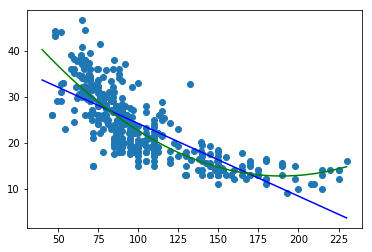

In [145]:
auto = pd.read_table('Auto',sep='\s+')
rows=np.sum(auto.values=='?',axis=1)
delete_rows = []
for idx,_ in enumerate(rows):
    if _!=0:
        delete_rows.append(idx)
auto=auto.drop(auto.index[delete_rows])
data = auto[['mpg','horsepower']]
horsepower= data['horsepower'].values.astype('float')
data['horsepower_2'] = horsepower * horsepower
data['beta_0'] = np.full(horsepower.shape,1.0)
# plot the scatter 
plt.scatter(horsepower, auto['mpg'])
# calcault linear
X = data[['horsepower','beta_0']].values.astype('float')
y = data['mpg'].values.astype('float').reshape(X.shape[0],1)
beta_linear =inv(X.T.dot(X)).dot(X.T).dot(y)
X = data[['horsepower','horsepower_2','beta_0']].values.astype('float')
beta_linear2 = inv(X.T.dot(X)).dot(X.T).dot(y)
x = np.linspace(40,230, 500)
y_linear = x*beta_linear[0] + beta_linear[1]
y_linear2 = x*beta_linear2[0] + x*x*beta_linear2[1] +beta_linear2[2]
plt.plot(x, y_linear, c='b')
plt.plot(x, y_linear2, c='g')
plt.show()

## 3.6 Potential Probelms

### 3.6.1 Non-linearity of the Data
Residual plots are a useful graphical tool for identiying non-linearity.

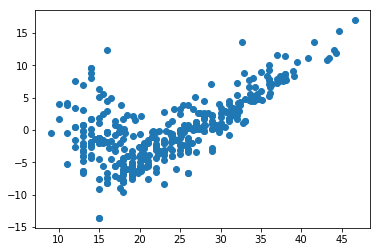

In [146]:
horsepower = data['horsepower'].values.astype('float')
mpg = data['mpg'].values.astype('float')
residual_linear = mpg - (horsepower*beta_linear[0]+beta_linear[1])
plt.scatter(mpg, residual_linear)
plt.show()

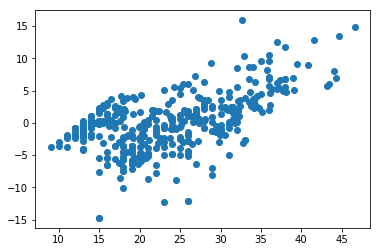

In [147]:
residual_quadratic = mpg - (horsepower*beta_linear2[0]+horsepower*horsepower*beta_linear2[1]+beta_linear2[-1])
plt.scatter(mpg, residual_quadratic)
plt.show()

### 3.6.2 Correlation of Error Terms
Why might correlations among the error terms occur? Such correlationsfrequently occur in the context of time series data

### 3.6.3 Non-constant Variance of Error Terms
Another important assumption of the linear regression model is that the error terms have a constant variance, $Var(\epsilon_i) = \sigma ^2$. The standard errors, confidence intervals, and hypothesis tests associated with the linear model rely upon this assumption.

### 3.6.4 Outlier
An outlier is a point for which $y_i$ is far from the value predicted by the model. Use residual plot can recognize the outliers.

### 3.6.5 High leverage
For simple linear regression
$$
h_i=\frac{1}{n}+\frac{(x_i-\bar{x})^2}{\sum_{i=1}^n(x_{i'}-\bar{x})^2}
$$

### Collinearity
ollinearity refers to the situation in which two or more predictor variables are closely related to one another. We  detect from correlation matrix.

# 4 K-Nearest Neighbors Regression
$$
\hat{f}(x_0)=\frac{1}{k}\sum_{x_i \in N_0}y_i
$$
where $y_i$s are k nearest neighbors points

# 5 Exercises
## 5.1 Auto Data
$$mpg = \beta_0 + \beta_1 \times horsepower$$

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
auto = pd.read_table('Auto',sep='\s+')
rows=np.sum(auto.values=='?',axis=1)
delete_rows = []
for idx,_ in enumerate(rows):
    if _!=0:
        delete_rows.append(idx)
auto=auto.drop(auto.index[delete_rows])
horsepower= auto['horsepower'].values.astype('float')
auto['ones'] = np.full(horsepower.shape, 1.0)
X = auto[['horsepower','ones']].values.astype('float')
y = auto['mpg'].values.astype('float').reshape(X.shape[0],1)
beta_linear =inv(X.T.dot(X)).dot(X.T).dot(y)
print('β0 :',beta_linear[-1][0])
print('β1 :', beta_linear[0][0])

β0 : 39.9358610212
β1 : -0.157844733354


In [9]:
sample_num = len(y)
residual = np.power(X.dot(beta_linear)-y,2).sum()
sigma = np.sqrt(residual/(sample_num-2))
horsepower_98 = np.array([[98.0,1.0]])
mpg_98 = horsepower_98.dot(beta_linear)[0,0]
mpg_98_uppper_bound = mpg_98+2*sigma
mpg_98_lower_bound = mpg_98-2*sigma
print('predict value is %f when horsepower is 98'%mpg_98)
print('The range is [%f,%f]' %(mpg_98_lower_bound,mpg_98_uppper_bound))

predict value is 24.467077 when horsepower is 98
The range is [14.655563,34.278591]


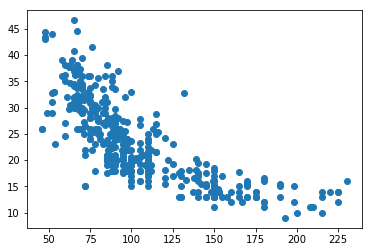

In [11]:
mpg = auto['mpg'].values.astype('float')
plt.scatter(horsepower, mpg)
plt.show()

In [13]:
auto_cor=auto[['mpg','displacement','horsepower','weight','acceleration']]
auto_cor.corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.805127,-0.832244,0.423329
displacement,-0.805127,1.000000,0.932994,-0.543800
weight,-0.832244,0.932994,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.416839,1.000000
